# Generating wordcloud

In [247]:
# Python program to generate WordCloud

# importing the necessary modules
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import csv

import networkx as nx
import numpy as np
import pandas as pd

import nltk
from nltk import bigrams
import gensim
from gensim.parsing.preprocessing import remove_stopwords
import itertools
import collections


# file object is created
file_ob = open("20211218_alltitle_abstracts.csv", encoding='utf-8-sig')

# reader object is created
reader_ob = csv.reader(file_ob)

# contents of reader object is stored .
# data is stored in list of list format.
reader_contents = list(reader_ob)


In [248]:
text_list = []
text_list_split = []
text = []

# iterating through list of rows
for row in reader_contents:

    # iterating through words in the row
    for i in range(len(row)):

        # convert to lower case and remove punctuations/other irrelevant characters
        row[i] = row[i].strip().lower().replace('.', '').replace(',', '').replace('"', '').replace(':','')
        row[i] = row[i].replace('?','').replace('!','').replace(';','').replace('(', '').replace(')', '').replace('©','')
        row[i] = row[i].replace('\xa0','').replace('\u2009','').replace('\n','').replace('+','')
        row[i] = row[i].replace('elsevier', '').replace('bv', '')

        
        # remove stopwords
        row[i] = remove_stopwords(row[i])
        
        # create version for words split up
        txt_clean = row[i].split()
        
        # create single continuous list of all words
        for word_list in txt_clean:
            text.append(word_list)
        
        # create list of title-abstract entries split by word
        text_list_split.append(txt_clean)
            
    # create list of lists of title-abstract entries
    text_list.append(row)
    

In [249]:
text_str = ' '.join(text)

wordcloud = WordCloud(width=800,
                      height=800,
                      background_color ='white').generate(text_str)


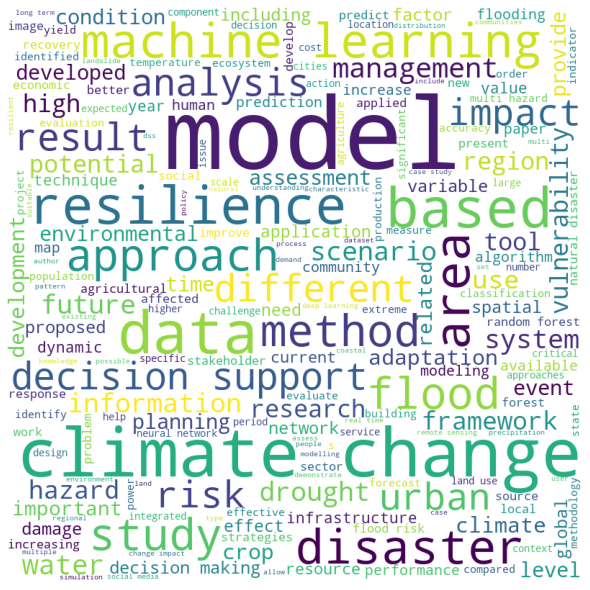

In [250]:
# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()


# Word Co-Occurrence Frequency Analysis

In [255]:
# Ref: https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/calculate-tweet-word-bigrams/

# Search terms
keywords = ['artificial intelligence', 'machine learning', 'deep learning', 'neural net', 'autonomous system',
            'adaptation', 'resilience', 'systemic risk', 'interconnected risk', 'compound risk', 'cascading risk',
            'multi-hazard', 'climate', 'disaster']

# keywords also of interest
keywords2 = ['decision support', 'management', 'policy', 'flood', 'drought', 'vulnerability', 
             'predict']

# Create dictionary of word frequencies

freq = {i: text_str.count(i) for i in keywords}
freq2 = {i: text_str.count(i) for i in keywords2}

for i, j in freq.items():
    print(i,':',j)

for i, j in freq2.items():
    print(i,':',j)
    

artificial intelligence : 26
machine learning : 139
deep learning : 30
neural net : 36
autonomous system : 1
adaptation : 229
resilience : 274
systemic risk : 0
interconnected risk : 0
compound risk : 0
cascading risk : 0
multi-hazard : 39
climate : 533
disaster : 343
decision support : 120
management : 180
policy : 48
flood : 276
drought : 129
vulnerability : 93
predict : 176


In [252]:
terms_bigram = [list(bigrams(entry)) for entry in text_list_split]

#Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

bigram_df = pd.DataFrame(bigram_counts.most_common(50),
                             columns=['bigram', 'count'])

bigram_df.to_csv('bigram_counts.csv')
bigram_df

,bigram,count
0,"(climate, change)",308
1,"(machine, learning)",134
2,"(decision, support)",120
3,"(random, forest)",40
4,"(land, use)",35
5,"(flood, risk)",33
6,"(social, media)",33
7,"(case, study)",31
8,"(decision, making)",30
9,"(deep, learning)",30


# Network Graph

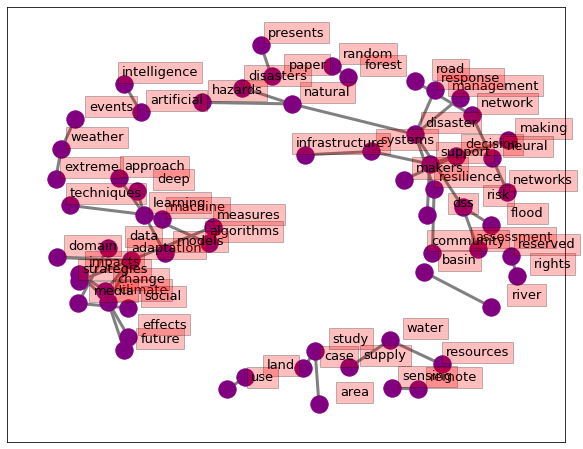

In [253]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')

# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

fig, ax = plt.subplots(figsize=(10, 8))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()